<a href="https://colab.research.google.com/github/tangshuting/daytoy/blob/master/%E2%80%9CBIM_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
                                                    
pretrained_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

14540800/14536120 [==============================] - 1s 0us/step


In [0]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = image/255
  image = tf.image.resize(image, (224, 224))
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

In [4]:
image_path = tf.keras.utils.get_file('chickadee.jpg', 'http://dns2.expoli.tech:8090/f/3b61b4eb60764e3aacdf/?dl=1')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

131072/127700 [==============================] - 0s 1us/step


40960/35363 [==================================] - 0s 0us/step


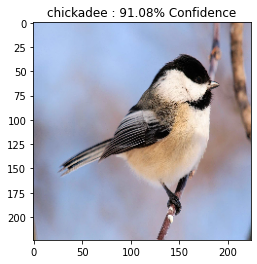

In [5]:
plt.figure()
plt.imshow(image[0])
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [0]:
# T = 2
# eps = 0.1
# a = eps/T

In [0]:
# loss_object = tf.keras.losses.CategoricalCrossentropy()
# prediction = pretrained_model(input_image)
# loss = loss_object(input_label, prediction)
# gradient = tape.gradient(loss, input_image)
# signed_grad = tf.sign(gradient)

In [0]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [0]:
# # Get the input label of the image.
# chickadee_index = 19
# label = tf.one_hot(chickadee_index, image_probs.shape[-1])
# label = tf.reshape(label, (1, image_probs.shape[-1]))

# perturbations = create_adversarial_pattern(image, label)
# plt.imshow(perturbations[0])

In [0]:
def display_images(image):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0])
  plt.title(' Epsilons={:0.3f} \n {}:  {:.2f}% Confidence'.format( epsilon ,label, confidence*100))
                                                
  plt.show()

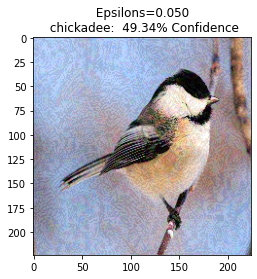

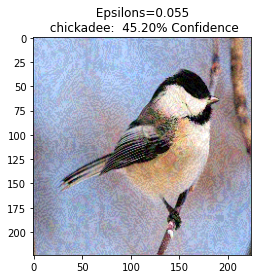

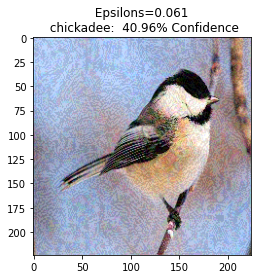

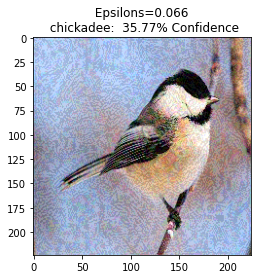

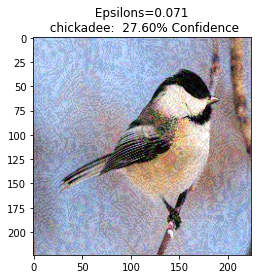

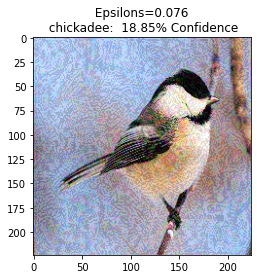

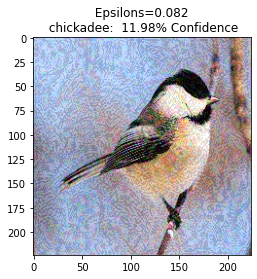

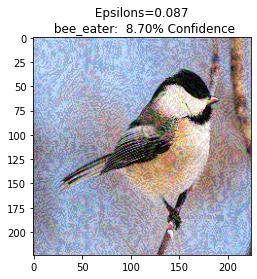

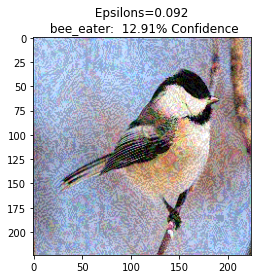

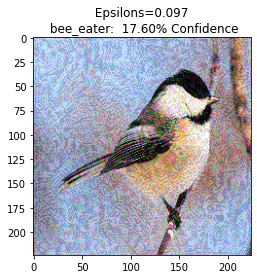

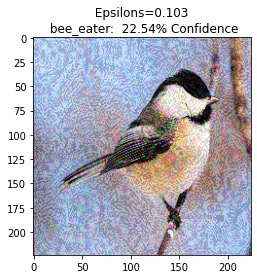

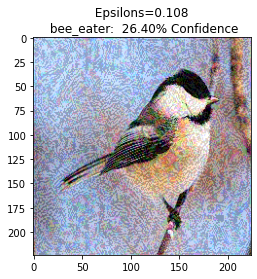

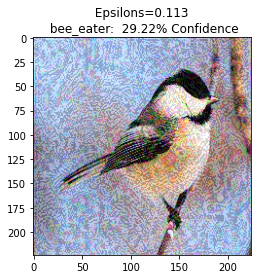

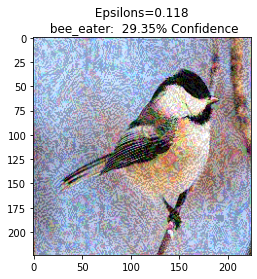

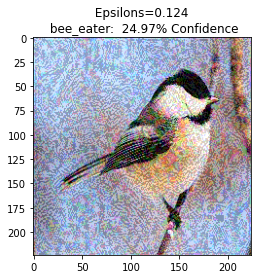

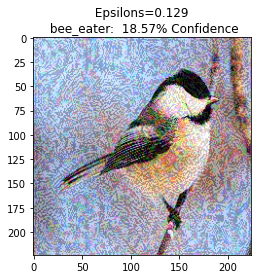

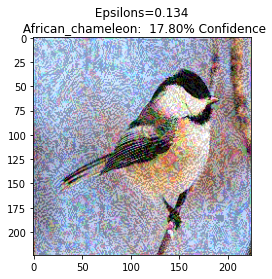

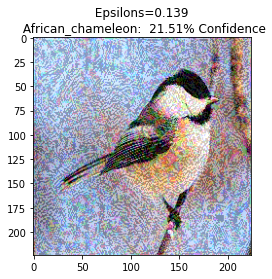

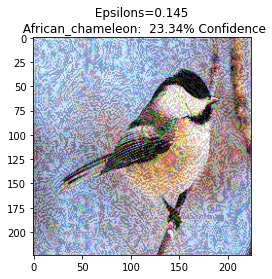

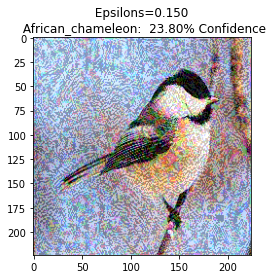

In [9]:
epsilons = np.linspace(0.05, 0.15, num=20)
for  epsilon in epsilons[:]:
  adv_x = image
  perturbations = create_adversarial_pattern(adv_x, pretrained_model(adv_x))
  adv_x_i = adv_x + epsilon*perturbations
  adv_x_i = tf.clip_by_value(adv_x_i, 0, 1) 
  
  
  display_images(adv_x_i)

In [0]:
# _, label, confidence = get_imagenet_label(pretrained_model.predict(adv_x_i))
# plt.figure()
# plt.imshow(adv_x_i[0])
# plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))

In [0]:
# epsilons = [0, 0.01, 0.1, 0.15]
# descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
#                 for eps in epsilons]

# for i, eps in enumerate(epsilons):
#   adv_x = image + eps*perturbations
#   adv_x = tf.clip_by_value(adv_x, 0, 1)
#   display_images(adv_x, descriptions[i])

In [0]:
# https://github.com/soumyac1999/FGSM-Keras 橘子 目标加非目标
# https://github.com/zk31601102/FGSM-fashion-mnist 易读
# 